In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [2]:
train_images.shape, test_images.shape

((60000, 28, 28), (10000, 28, 28))

In [3]:
train_images.dtype

dtype('uint8')

In [4]:
X_valid, X_train= train_images[:5000]/255., train_images[5000:]/255.
y_valid, y_train= train_labels[:5000], train_labels[5000:]
X_test, y_test= test_images/255., test_labels

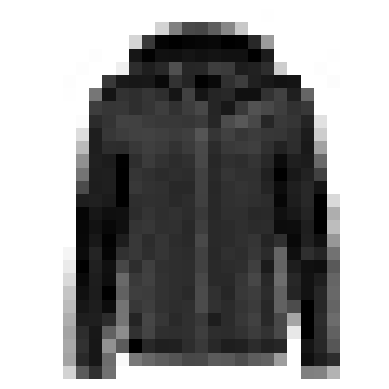

In [5]:
#plot image from traing
plt.imshow(X_train[0], cmap='binary')
plt.axis('off')
plt.show()

In [6]:
y_train

array([4, 0, 7, ..., 3, 0, 5], dtype=uint8)

In [7]:
y_train[0]

np.uint8(4)

In [8]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

print(class_names[y_train[0]])

Coat


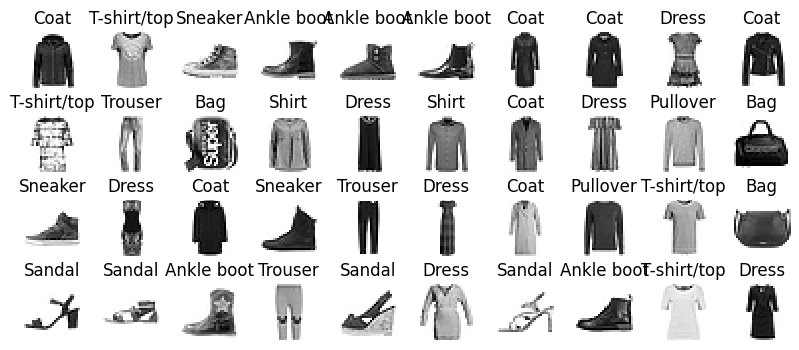

In [9]:
# flor few of the dataset
n_rows=4
n_col=10
plt.subplots(n_rows, n_col, figsize=(n_col, n_rows))
for row in range(n_rows):
    for col in range(n_col):
        index = n_col * row + col
        plt.subplot(n_rows, n_col, index + 1)
        plt.imshow(X_train[index], cmap='binary', interpolation='nearest')
        plt.axis('off')
        plt.title(class_names[y_train[index]])

plt.subplots_adjust(hspace=0.5, wspace=0.2)
plt.show()


#### Kera Model for Image Classsification

In [20]:
model= keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28,28]))
model.add(keras.layers.Dense(300, activation='relu'))
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [21]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [22]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 300)            │       235,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 100)            │        30,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 266,610 (1.02 MB)

 Trainable params: 266,610 (1.02 MB)

 Non-trainable params: 0 (0.00 B)

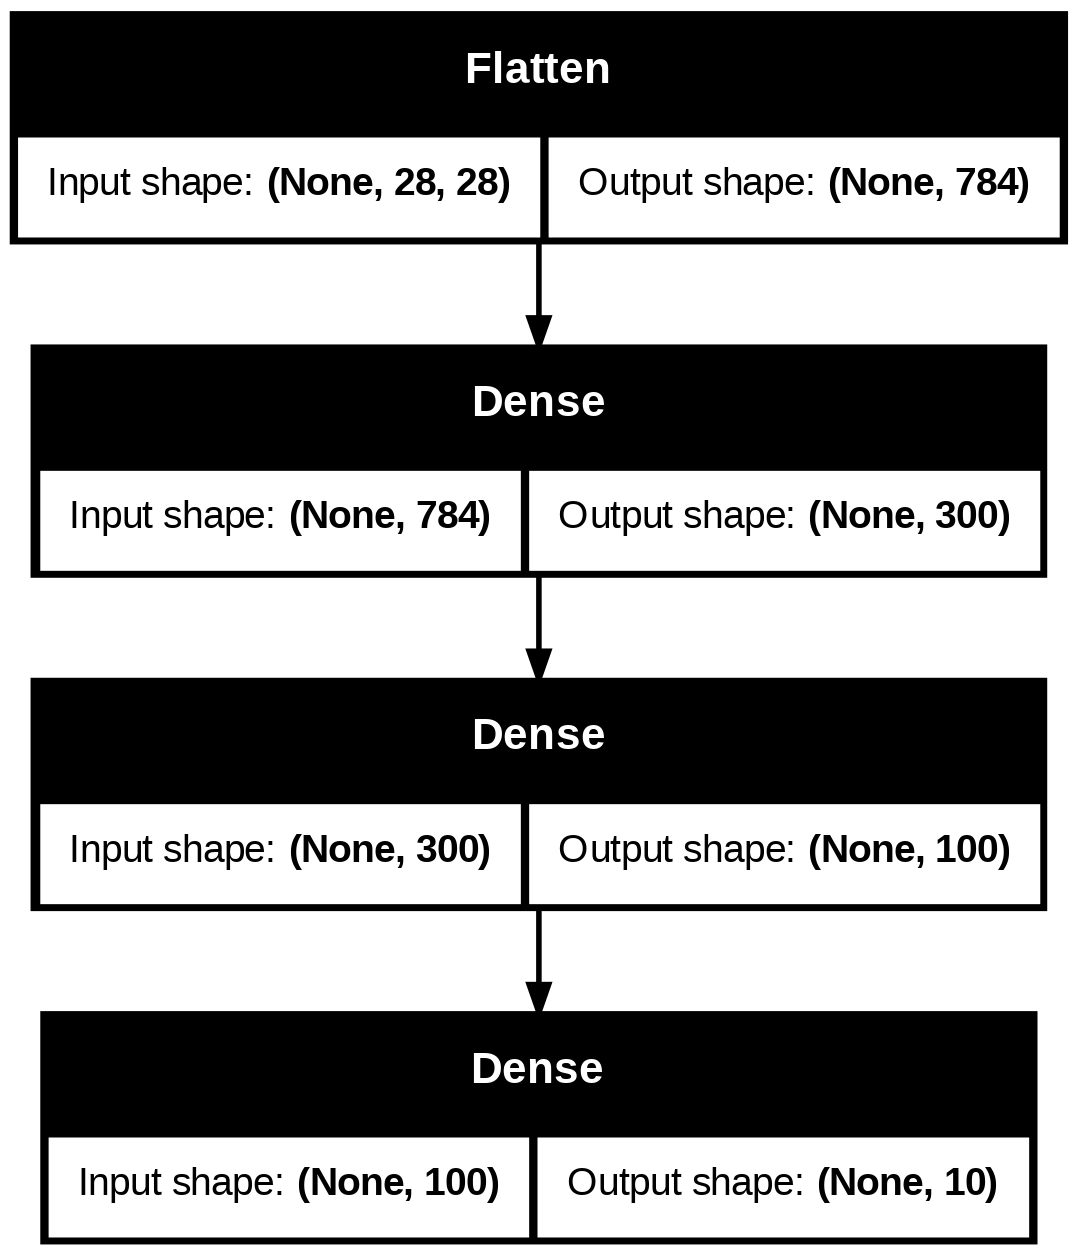

In [14]:
keras.utils.plot_model(model,'mnist_fashion_neural_network.png', show_shapes=True)

In [23]:
# layer 1
hidden_1= model.layers[1]
hidden_1.get_weights()

[array([[-0.02316847,  0.01846542,  0.01227453, ..., -0.04990301,
          0.03071907,  0.02140313],
        [-0.03912878, -0.04958972, -0.03632202, ..., -0.0256365 ,
          0.01350161, -0.00965744],
        [-0.04549871, -0.06642986, -0.04433876, ..., -0.03736318,
          0.02758496,  0.06657371],
        ...,
        [-0.04487618, -0.05336249, -0.03421558, ..., -0.0728903 ,
         -0.04234409,  0.07392332],
        [ 0.06974815,  0.04496463, -0.05236255, ..., -0.06078298,
          0.06026381, -0.05083399],
        [-0.07393294, -0.0068882 ,  0.06620693, ...,  0.01736178,
         -0.05474709,  0.07248659]], dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.

In [24]:
early_stopping_cb = keras.callbacks.EarlyStopping(patience=10,restore_best_weights=True)
model.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid),callbacks=[early_stopping_cb])
#impplement early stopping

#use it in model

Epoch 1/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.7757 - loss: 0.6286 - val_accuracy: 0.8654 - val_loss: 0.3770
Epoch 2/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.8613 - loss: 0.3770 - val_accuracy: 0.8762 - val_loss: 0.3405
Epoch 3/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.8774 - loss: 0.3325 - val_accuracy: 0.8814 - val_loss: 0.3253
Epoch 4/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.8873 - loss: 0.3054 - val_accuracy: 0.8858 - val_loss: 0.3162
Epoch 5/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.8929 - loss: 0.2867 - val_accuracy: 0.8858 - val_loss: 0.3154
Epoch 6/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.8985 - loss: 0.2700 - val_accuracy: 0.8918 - val_loss: 0.3089
Epoch 7/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9051 - loss: 0.2534 - val_accuracy: 0.8864 - val_loss: 0.3233
Epoch 8/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 20s 6ms/step - accuracy: 0.9101 - loss: 0

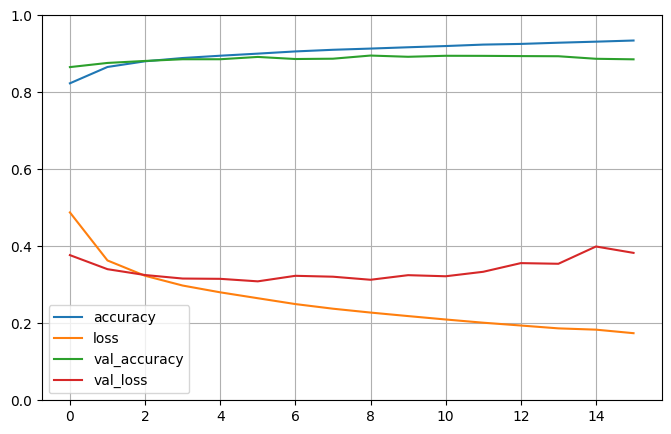

In [25]:
import pandas as pd

pd.DataFrame(model.history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [27]:
model.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8723 - loss: 0.3536


[0.3503355383872986, 0.8741999864578247]

#### Testing

In [28]:
X_new= X_test[:5]
y_pred= np.argmax(model.predict(X_new), axis=-1)
print(y_pred)
print(y_test[:5])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
[9 2 1 1 6]
[9 2 1 1 6]


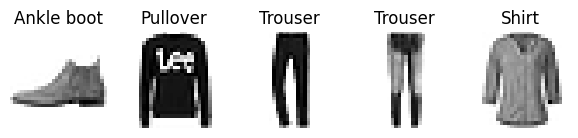

In [30]:
plt.figure(figsize=(7.2, 2.4))
for index, image in enumerate(X_new):
    plt.subplot(1, 5, index + 1)
    plt.imshow(image, cmap="binary", interpolation="nearest")
    plt.axis('off')
    plt.title(class_names[y_test[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

#### building this with neural network from scratch


In [10]:
import numpy as np

class Layer_Flatten:
    def forward(self, inputs):
        # Save input for backpropagation
        self.inputs = inputs
        # Flatten each image from (28,28) → (784,)
        self.output = inputs.reshape(inputs.shape[0], -1)

    def backwards(self, dvalues):
        # Reshape the gradient back to original input shape
        self.dinputs = dvalues.reshape(self.inputs.shape)


In [11]:
# RSMA weight intialization techniques and regularization

class Layer_Dense_v2:
  def __init__(self, n_inputs, n_neurons,
               weigt_geg_l1=0, bias_reg_l1=0,
               weight_reg_l2=0, bias_reg_l2=0, weight_intialization='random') -> None:
     if weight_intialization=='random':
      self.weights= np.random.randn(n_inputs, n_neurons)
     elif weight_intialization=='he':
      self.weights=  np.random.randn(n_inputs, n_neurons) * np.sqrt(2.0 /n_inputs)
     self.bias= np.zeros((1, n_neurons))
     self.weight_reg_l1= weigt_geg_l1
     self.bias_reg_l1= bias_reg_l1
     self.weight_reg_l2= weight_reg_l2
     self.bias_reg_l2= bias_reg_l2

  def forward(self, inputs):
    self.inputs= inputs
    self.output= np.dot(inputs, self.weights) + self.bias

  def backwards(self, dvalues):

    self.dweights= np.dot(self.inputs.T, dvalues)
    self.dbias= np.sum(dvalues, axis=0, keepdims=True)

    # chek for the regulairization parameters
    if self.weight_reg_l1 > 0:
      dL1= np.ones_like(self.weights)
      dL1[self.weights < 0] = -1
      self.dweights += self.weight_reg_l1 * dL1

    if self.bias_reg_l1 > 0:
      dL1= np.ones_like(self.bias)
      dL1[self.bias < 0] = -1
      self.dbias += self.bias_reg_l1 * dL1

    if self.weight_reg_l2 > 0:
      self.dweights += 2 * self.weight_reg_l2 * self.weights

    if self.bias_reg_l2 > 0:
      self.dbias += 2 * self.bias_reg_l2 * self.bias

    self.dinputs= np.dot(dvalues, self.weights.T)


In [12]:

class Activation_Relu:
  def forward(self, X):
    self.input= X
    self.output= np.maximum(0,X)

  def backward(self, dvalue):
    self.dinputs= dvalue.copy()
    self.dinputs=np.where(self.input>0 ,self.dinputs, 0)

In [13]:

class Activation_Softmax:
  def forward(self, inputs):
    exp_values= np.exp(inputs-np.max(inputs, axis=1, keepdims=True))
    # print(exp_values.shape)
    probabilites= exp_values/np.sum(exp_values, axis=1, keepdims=True)
    self.output= probabilites


In [14]:
# loss with regularization
class Loss_v1:
  def regularization_loss(self, layer):
    self.reg_loss= 0
    if layer.weight_reg_l1 > 0:
      self.reg_loss += layer.weight_reg_l1 * np.sum(np.abs(layer.weights))
    if layer.weight_reg_l2 > 0:
      self.reg_loss += layer.weight_reg_l2 * np.sum(layer.weights * layer.weights)
    if layer.bias_reg_l1 > 0:
      self.reg_loss += layer.bias_reg_l1 * np.sum(np.abs(layer.bias))
    if layer.bias_reg_l2 > 0:
      self.reg_loss += layer.bias_reg_l2 * np.sum(layer.bias * layer.bias)
    return self.reg_loss

  def calculate(self, output, y):
    sample_losses= self.forward(output, y)
    data_loss= np.mean(sample_losses)
    return data_loss


class Loss_CategoricalCrossentropy_reg(Loss_v1):
    # Forward pass
    def forward(self, y_pred, y_true):
        # Number of samples in a batch
        samples = len(y_pred)

        # Clip data to prevent division by 0
        # Clip both sides to not drag mean towards any value
        y_pred_clipped = np.clip(y_pred, 1e-7, 1 - 1e-7)

        # Probabilities for target values -
        # only if categorical labels
        if len(y_true.shape) == 1:
            correct_confidences = y_pred_clipped[range(samples),y_true]
        # Mask values - only for one-hot encoded labels
        elif len(y_true.shape) == 2:
            correct_confidences = np.sum(y_pred_clipped * y_true,axis=1)

        # Losses
        negative_log_likelihoods = -np.log(correct_confidences)
        return negative_log_likelihoods

    # Backward pass
    def backward(self, dvalues, y_true):
        # Number of samples
        samples = len(dvalues)
        # Number of labels in every sample
        # We'll use the first sample to count them
        labels = len(dvalues[0])

        # If labels are sparse, turn them into one-hot vector
        if len(y_true.shape) == 1:
            y_true = np.eye(labels)[y_true]

        # Calculate gradient
        self.dinputs = -y_true / dvalues
        # Normalize gradient
        self.dinputs = self.dinputs / samples

In [15]:
# Softmax classifier - combined Softmax activation
# and cross-entropy loss for faster backward step
class Activation_Softmax_Loss_CategoricalCrossentropy:
    # Creates activation and loss function objects
    def __init__(self):
        self.activation = Activation_Softmax()
        self.loss = Loss_CategoricalCrossentropy_reg() # Use the corrected loss class

    # Forward pass
    def forward(self, inputs, y_true):
        # Output layer's activation function
        self.activation.forward(inputs)
        # Set the output
        self.output = self.activation.output
        # Calculate and return loss value
        return self.loss.calculate(self.output, y_true) # Call forward method of the loss attribute

    # Backward pass
    def backward(self, dvalues, y_true):
        # Number of samples
        samples = len(dvalues)
        # If labels are one-hot encoded,
        # turn them into discrete values
        if len(y_true.shape) == 2:
            y_true = np.argmax(y_true, axis=1)
        # Copy so we can safely modify
        self.dinputs = dvalues.copy()
        # Calculate gradient
        self.dinputs[range(samples), y_true] -= 1
        # Normalize gradient
        self.dinputs = self.dinputs / samples

In [16]:
class Optimizer_Adam_Reg:
    # Initialize optimizer - set settings
    def __init__(self, learning_rate=0.001, decay=0., epsilon=1e-7, beta_1=0.9, beta_2=0.9):
        self.learning_rate = learning_rate
        self.current_learning_rate = learning_rate
        self.decay = decay
        self.iterations = 0
        self.epsilon = epsilon
        self.beta_1 = beta_1
        self.beta_2 = beta_2

    def pre_update_params(self):
        if self.decay:
            self.current_learning_rate = self.learning_rate * (1. / (1. + self.decay * self.iterations))

    def update_params(self, layer):
        # If layer does not contain cache arrays, create
        if not hasattr(layer, 'weight_cache'):
            layer.weight_momentums = np.zeros_like(layer.weights)
            layer.weight_cache = np.zeros_like(layer.weights)
            layer.bias_momentums = np.zeros_like(layer.bias)
            layer.bias_cache = np.zeros_like(layer.bias)

        # Update momentum with current gradients
        layer.weight_momentums = self.beta_1 * layer.weight_momentums + (1 - self.beta_1) * layer.dweights
        layer.bias_momentums = self.beta_1 * layer.bias_momentums + (1 - self.beta_1) * layer.dbias

        # Get corrected momentum
        # self.iteration is 0 at first pass and we need to start with 1 here
        weight_momentums_corrected = layer.weight_momentums / (1 - self.beta_1 ** (self.iterations + 1))
        bias_momentums_corrected = layer.bias_momentums / (1 - self.beta_1 ** (self.iterations + 1))

        # Update cache with squared current gradients
        layer.weight_cache = self.beta_2 * layer.weight_cache + (1 - self.beta_2) * layer.dweights**2
        layer.bias_cache = self.beta_2 * layer.bias_cache + (1 - self.beta_2) * layer.dbias**2

        # Get corrected cache
        weight_cache_corrected = layer.weight_cache / (1 - self.beta_2 ** (self.iterations + 1))
        bias_cache_corrected = layer.bias_cache / (1 - self.beta_2 ** (self.iterations + 1))

        # Vanilla SGD parameter update + normalization with square rooted cache
        layer.weights += -self.current_learning_rate * weight_momentums_corrected / (np.sqrt(weight_cache_corrected) + self.epsilon)
        layer.bias += -self.current_learning_rate * bias_momentums_corrected / (np.sqrt(bias_cache_corrected) + self.epsilon)

    # Call once after any parameter updates
    def post_update_params(self):
        self.iterations += 1

#### This is the traning of the neural network from scratch, for ease of traning we have taken 100 data points for traning and after traning we test it on another 100 data point for now the traning acc is 1.00 and testing acc is 0.90 although the model is overfitting even after using regulairization but we got an good understanding of how neural network works from scratch 😎

In [17]:
X_train_1= X_train[:100]
y_train_1= y_train[:100]
X_train_1= X_train_1.astype(np.float32)
# y_train_1= y_train_1.astype(np.float32)
flatten = Layer_Flatten()
# dense1 = Layer_Dense_v2(784, 128)

dense1= Layer_Dense_v2(784, 128, weight_reg_l2=5e-4, bias_reg_l2=5e-4)
activation1= Activation_Relu()
dense2= Layer_Dense_v2(128,10, weight_reg_l2=5e-4, bias_reg_l2=5e-4, weight_intialization='he')
loss_activation= Activation_Softmax_Loss_CategoricalCrossentropy()
optimizer= Optimizer_Adam_Reg(learning_rate=0.02, decay=1e-5)
for epoc in range(10001):
    flatten.forward(X_train_1)
    dense1.forward(flatten.output)
    activation1.forward(dense1.output)
    dense2.forward(activation1.output)

    data_loss= loss_activation.forward(dense2.output, y_train_1)
    reg_loss= loss_activation.loss.regularization_loss(dense1) + loss_activation.loss.regularization_loss(dense2)
    loss= data_loss + reg_loss

    prediction= np.argmax(loss_activation.output, axis=1)
    if len(y_train_1.shape) == 2:
        y_train_1 = np.argmax(y_train_1, axis=1)
    accuracy= np.mean(prediction==y_train_1)

    if not epoc % 100:
        print(f'epoc: {epoc}, accuracy: {accuracy:.3f}, loss: {loss:.3f}, reg_weight_loss: {reg_loss:.3f}, reg_bias_loss: {reg_loss:.3f}, Learning: {optimizer.current_learning_rate}')

    loss_activation.backward(loss_activation.output, y_train_1)
    dense2.backwards(loss_activation.dinputs)
    activation1.backward(dense2.dinputs)
    dense1.backwards(activation1.dinputs)
    flatten.backwards(dense1.dinputs)

    optimizer.pre_update_params()
    optimizer.update_params(dense1)
    optimizer.update_params(dense2)
    optimizer.post_update_params()



epoc: 0, accuracy: 0.110, loss: 61.112, reg_weight_loss: 50.216, reg_bias_loss: 50.216, Learning: 0.02
epoc: 100, accuracy: 1.000, loss: 2.189, reg_weight_loss: 2.180, reg_bias_loss: 2.180, Learning: 0.01998021958261321
epoc: 200, accuracy: 1.000, loss: 0.195, reg_weight_loss: 0.184, reg_bias_loss: 0.184, Learning: 0.019960279044701046
epoc: 300, accuracy: 1.000, loss: 0.069, reg_weight_loss: 0.066, reg_bias_loss: 0.066, Learning: 0.019940378268975763
epoc: 400, accuracy: 1.000, loss: 0.138, reg_weight_loss: 0.136, reg_bias_loss: 0.136, Learning: 0.01992051713662487
epoc: 500, accuracy: 1.000, loss: 0.055, reg_weight_loss: 0.052, reg_bias_loss: 0.052, Learning: 0.01990069552930875
epoc: 600, accuracy: 1.000, loss: 0.137, reg_weight_loss: 0.135, reg_bias_loss: 0.135, Learning: 0.019880913329158343
epoc: 700, accuracy: 1.000, loss: 0.080, reg_weight_loss: 0.067, reg_bias_loss: 0.067, Learning: 0.019861170418772778
epoc: 800, accuracy: 1.000, loss: 0.065, reg_weight_loss: 0.062, reg_bias_

In [21]:
#test the model
X_test_1= X_test[:100]/255.
y_test_1= y_test[:100]
X_test_1= X_test_1.astype(np.float32)
flatten.forward(X_test_1)
dense1.forward(flatten.output)
activation1.forward(dense1.output)
dense2.forward(activation1.output)
loss= loss_activation.forward(dense2.output, y_test_1)

predictions = np.argmax(loss_activation.output, axis=1)
if len(y_test_1.shape) == 2:
    y_test_1 = np.argmax(y_test_1, axis=1)
accuracy = np.mean(predictions == y_test_1)
print(f'validation, acc: {accuracy:.3f}, loss: {loss:.3f}')

validation, acc: 0.090, loss: 2.368


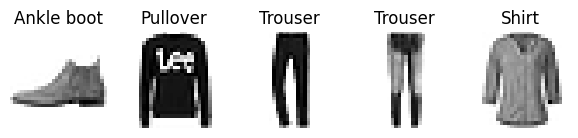

In [22]:
X_new= X_test_1[:5]
plt.figure(figsize=(7.2, 2.4))
for index, image in enumerate(X_new):
    plt.subplot(1, 5, index + 1)
    plt.imshow(image, cmap="binary", interpolation="nearest")
    plt.axis('off')
    plt.title(class_names[y_test_1[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()